In [1]:
import os
os.chdir("/home/kubikoid/python/spbu/spbu_ml_sem4")

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from src.homeworks.knn.knn_classifier import KNNClassifier

In [6]:
from src.homeworks.knn.processing import *

# **Load Data**

In [7]:
df_cancer = pd.read_csv("src/homeworks/knn/data/cancer.csv")

In [8]:
df_cancer

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y = df_cancer["label"]

In [10]:
y = y.apply(lambda x: int(x == "M"))

In [11]:
df_cancer.drop(columns=["label"], inplace=True)

# **Create Scaled Dataframes**

In [12]:
minmaxscaler, maxabsscaler = MinMaxScaler(), MaxAbsScaler()

In [13]:
df_cancer_minmax = df_cancer.copy()
df_cancer_minmax[:] = minmaxscaler.fit_transform(df_cancer.values, df_cancer.values)

In [14]:
df_cancer_maxabs = df_cancer.copy()
df_cancer_maxabs[:] = maxabsscaler.fit_transform(df_cancer.values, df_cancer.values)

# **Define plot function**

In [15]:
def draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, scaler_type) -> None:
    k_values = range(1, 20)  # Количество соседей от 1 до 20
    accuracy_scores = []
    f1_scores = []
    
    # Обучаем модель и вычисляем метрики для каждого k
    for k in k_values:
        knn = KNNClassifier(n_neighbours=k)
        knn.fit(x_train.values, y_train.values)
        y_pred = knn.predict(x_test.values)
        
        accuracy_scores.append(Metrics.accuracy(y_test.values, y_pred))
        f1_scores.append(Metrics.f1_score(y_test.values, y_pred))
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
    plt.plot(k_values, f1_scores, label='F1 Score', marker='s')
    
    # Добавляем подписи
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Number of Neighbors in KNN, SCALER: {scaler_type}')
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.show()

# **No Scaler**

In [16]:
x_train, y_train, x_test, y_test = train_test_split(df_cancer, y, test_size=0.3)

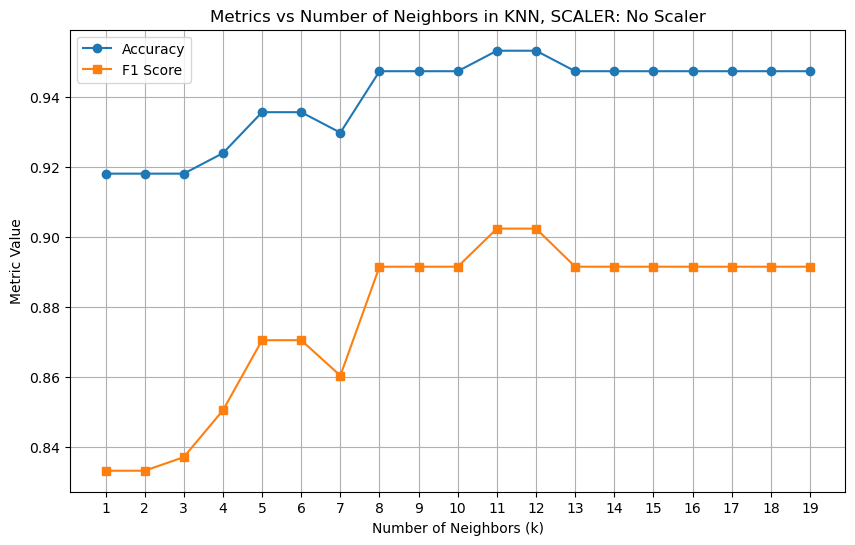

In [17]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "No Scaler")

As we can see from the plot, best accuracy and f1-score are achieved with **11-12 number of neighbours**.
With 1-10 number of neighbours metrics are growing, when with 13-19 metrics stay the same.
It means, that it is better not to learn model with neither too many, nor too few n_neighbours 

# **MinMax Scaler**

In [18]:
x_train, y_train, x_test, y_test = train_test_split(df_cancer_minmax, y, test_size=0.3)

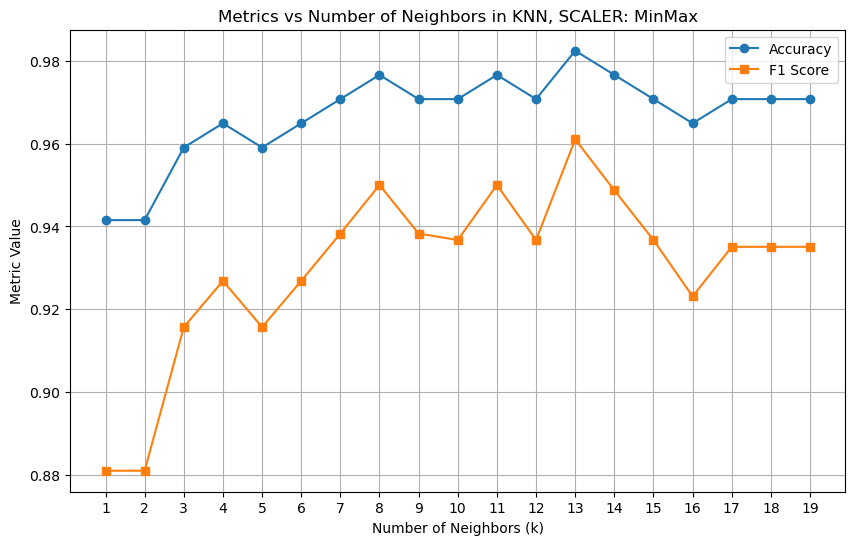

In [19]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "MinMax")

Almost same situation, the best accuracy and f1 are achieved in 13 n_neighbours. Important to mention the increase of metrics because of the scaling of the data.

# **MaxAbs Scaler**

In [20]:
x_train, y_train, x_test, y_test = train_test_split(df_cancer_maxabs, y, test_size=0.3)

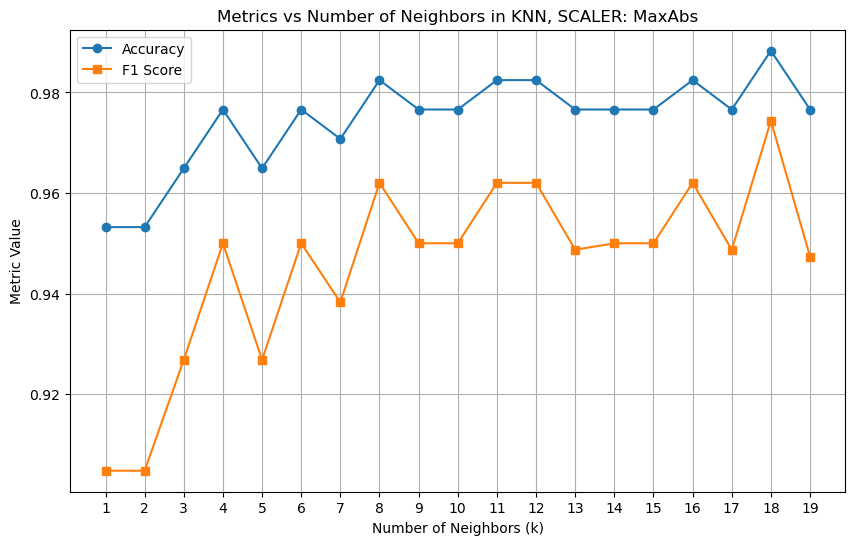

In [21]:
draw_plot_metrics_x_n_neighbours(x_train, y_train, x_test, y_test, "MaxAbs")

Even better performance (measured by metrics) with respect to minmax scaler.

# **Conculsion**

When you work work knn it is important to pick optimal number of neighbours for every dataset.
Also scalers boost performance immensely.